In [6]:
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy.stats import mannwhitneyu

import sys
sys.path.append('/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/src')

from src.utils import *
from src.kernels import Kernel
init_notebook_mode(connected=True) ## plotly init

import os
path_data = "/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/data/"

In [7]:
df_hr = pd.read_csv(path_data + 'HRVProcessedData[[Beat]].csv')

In [8]:
df_hr.head(), df_hr.columns, df_hr.shape

(   Unnamed: 0   Time        niHR        RR
 0           1  0.000  182.926773  328.0001
 1           2  0.328  182.926773  328.0001
 2           3  0.716  154.639375  387.9995
 3           4  1.124  147.058679  408.0004
 4           5  1.500  159.574468  376.0000,
 Index(['Unnamed: 0', 'Time', 'niHR', 'RR'], dtype='object'),
 (17178, 4))

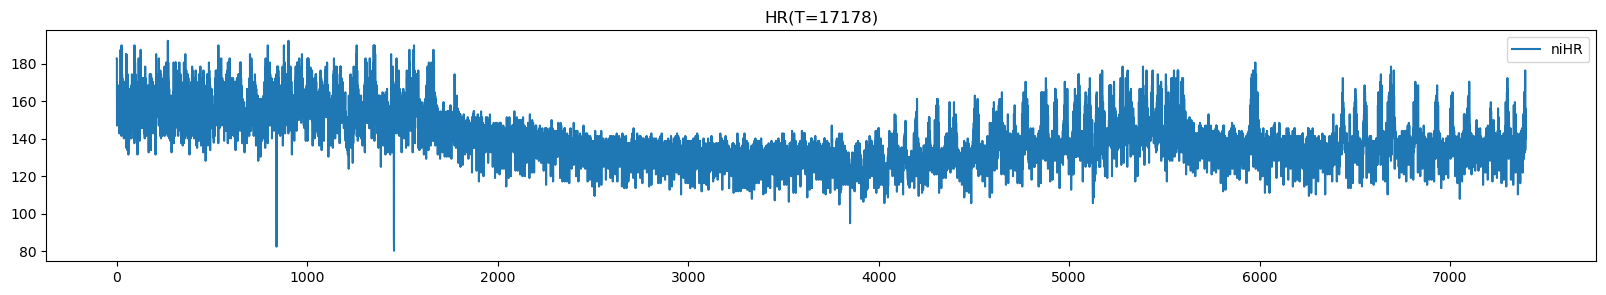

In [9]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(df_hr['Time'], df_hr['niHR'], label="niHR")
plt.legend()
plt.title("HR(T=17178)")
plt.show()

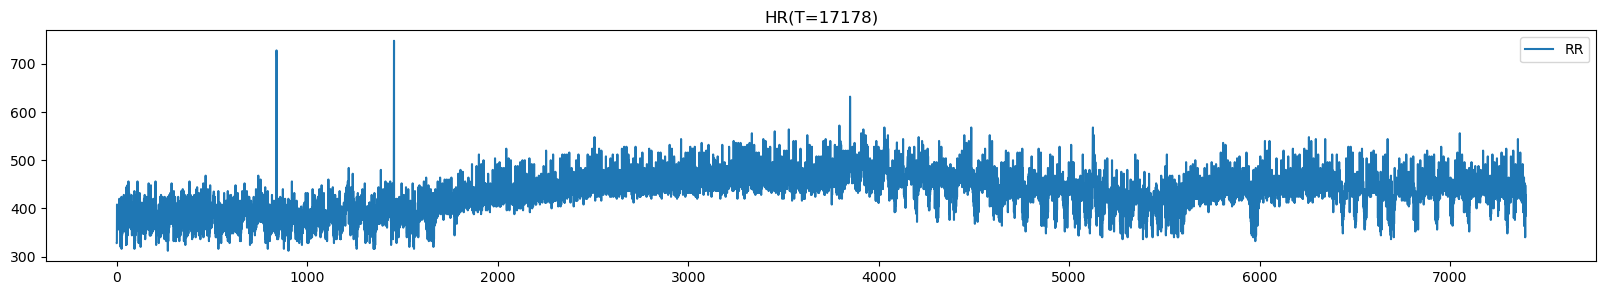

In [10]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(df_hr['Time'], df_hr['RR'], label="RR")
plt.legend()
plt.title("HR(T=17178)")
plt.show()

## Nadarawatson estimator 

In [22]:
# C = 2
space_kernel = "gaussian" # "silverman"
time_kernel = "uniform"
T = df_hr.shape[0]
d = 1
bandwidth = T **(-0.4 / (d+1)) / 30 #0.1 # 0.05
X_dict = df_hr['niHR'].values.reshape(-1,1) #df_malleco['Value'].diff().values.reshape(-1, 1)
X_tvar_2 = df_hr['niHR'].values #df_malleco['Value'].diff().values

GaussUnifKernel = Kernel(T=T, bandwidth=bandwidth, space_kernel=space_kernel, time_kernel=time_kernel)
GaussUnifKernel 
Y_t_T = df_hr['niHR'].values

weights = {}
for t in range(T):
    weights[str(t)] = GaussUnifKernel.fit(X_dict, t)
    
m_hat= [np.sum(weights[str(t)] * Y_t_T) for t in range(T)]

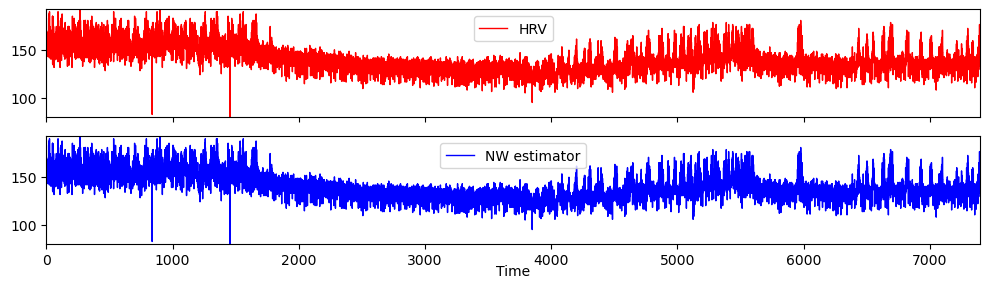

2024/06/04 22:25:15 Saved result in file HRV-NW-Gaussian-sp-Uniform-time-C-15.pdf


In [27]:
import logging

logging.basicConfig(
    format="%(asctime)s %(message)s", datefmt="%Y/%m/%d %H:%M:%S", level=logging.INFO
)

path_fig = "/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/figs/"

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,3) , sharex=True)
plt.subplots_adjust(wspace=0, hspace=0.02)
# plt.rcParams['axes.grid'] = True
# plt.rcParams['axes.facecolor'] = 'black'

output_filename = "HRV-NW-Gaussian-sp-Uniform-time-C-15.pdf"
# from matplotlib.colors import ListedColormap
# cm = plt.cm.RdBu
# cm_bright = ListedColormap(["#FF0000", "#0000FF"])

ax[0].plot(df_hr['Time'].values, X_tvar_2, lw=1, label="HRV", color="#FF0000")  # #, color="r") #, cmap=cm)
ax[0].set_xlim(min(df_hr['Time'].values), max(df_hr['Time'].values))
ax[0].set_ylim(min(min(m_hat), min(X_tvar_2)),  max(max(m_hat), max(X_tvar_2)))
ax[0].legend(loc='upper center')

ax[1].plot(df_hr['Time'].values, np.array(m_hat), lw=1, label="NW estimator" , c="#0000FF")#cm_bright[0]) #"orange")
ax[1].set_xlim(min(df_hr['Time'].values), max(df_hr['Time'].values))
ax[1].set_ylim(min(min(m_hat), min(X_tvar_2)),  max(max(m_hat), max(X_tvar_2)))
ax[1].legend(loc='upper center')
ax[1].set_xlabel("Time")
ax[1].xaxis.set_label_coords(0.5, -0.19)
plt.savefig(path_fig+output_filename, dpi=300)
plt.tight_layout()
plt.show()
logging.info("Saved result in file %s" % output_filename)

In [25]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

np.sqrt(mse(np.array(m_hat), X_tvar_2)), mae(np.array(m_hat), X_tvar_2)

(1.4874896022207777e-05, 5.408111373910678e-07)

In [ ]:
# C = 0.1 (0.19753487518485374, 0.1521864406875735)
# C = 10 (1.5284993345152873e-05, 5.885175159826092e-07) 
# C = 15 (1.5133207374047727e-05, 5.724991791154624e-07
# C = 30 (1.4874896022207777e-05, 5.408111373910678e-07)